In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import math
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')

### Data Understanding and Cleaning

In [3]:
df.shape

(45211, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [8]:
# Check for duplicated records
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.age.value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64

In [12]:
#Categorizing age groups:

def categorize_age(age):
    if 17< age < 25:
        return "young (18-24)"
    if 25 <= age <= 44:
        return "young Adults (25-44)"
    if 44 < age < 65:
        return "Adults (45-64)"
    else:
        return "Senior (+64)"

df['age_group'] = df['age'].apply(categorize_age)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Adults (45-64)
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,young Adults (25-44)
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,young Adults (25-44)
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Adults (45-64)
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,young Adults (25-44)


In [13]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [14]:
df.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [15]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [16]:
# Checking the distribution of unknown education over ages:

df3=df[df.education == 'unknown']
pd.crosstab(df3.education, df3.age, margins = True)

age,18,19,20,21,22,23,24,25,26,27,...,79,80,81,82,83,85,86,92,93,All
education,,,,,,,,,,,,,,,,,,,,,
unknown,7,9,15,9,11,9,20,24,15,29,...,2,1,2,2,1,1,1,2,2,1857
All,7,9,15,9,11,9,20,24,15,29,...,2,1,2,2,1,1,1,2,2,1857


In [17]:
df.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [18]:
df.housing.value_counts()

housing
yes    25130
no     20081
Name: count, dtype: int64

In [19]:
df.loan.value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

In [20]:
df.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [21]:
df.month.value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [22]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [23]:
# Extracting numerical and categorical columns for future plotting purposes:

num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [24]:
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

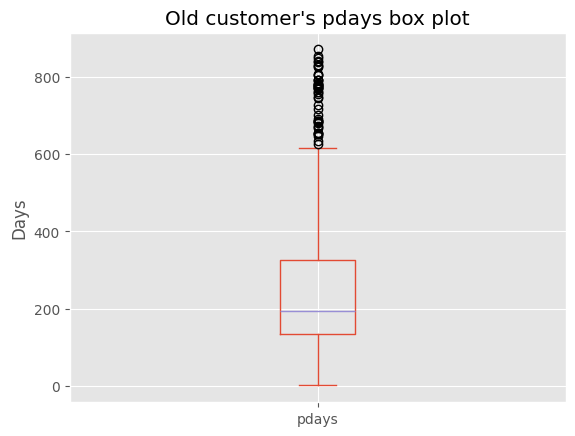

In [25]:
# Box plot of all old pdays of old customers:

df.query("pdays>0").pdays.plot(kind='box')
plt.title("Old customer's pdays box plot")
plt.ylabel("Days")
plt.show()

In [26]:
# Mapping categorical columns to 0 and 1 for aggregation purposes:

df.y = df.y.map({'no': 0, 'yes': 1})
df.default = df.default.map({'no': 0, 'yes': 1})
df.housing = df.housing.map({'no': 0, 'yes': 1})
df.loan = df.loan.map({'no': 0, 'yes': 1})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,Adults (45-64)
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,young Adults (25-44)
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,young Adults (25-44)
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,Adults (45-64)
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,young Adults (25-44)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1,Adults (45-64)
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1,Senior (+64)
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1,Senior (+64)
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0,Adults (45-64)


In [28]:
# Outlier detection based on quantiles.
df.campaign.quantile(0.997)

np.float64(25.0)

In [29]:
# To check whether quantiles are suitable indicators of outliers? (Contextual analysis)
campaign_gt_5 = df.query('campaign >5').y.mean()*100
campaign_le_5 = df.query('campaign <=5').y.mean()*100
print(f"Campaign > 5 Success rate: {campaign_gt_5:.2f}%, Campaign <= 5 Success rate: {campaign_le_5:.2f}%")

Campaign > 5 Success rate: 5.81%, Campaign <= 5 Success rate: 12.33%


<Axes: >

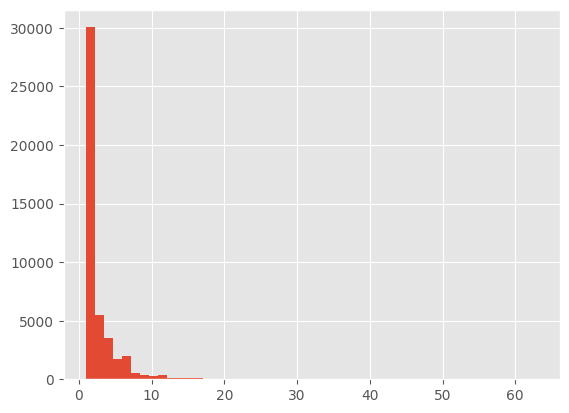

In [30]:
df.campaign.hist(bins=50)

In [31]:
# Drop outliers of campaign:
df.drop(df[df.campaign > 25].index,inplace= True)

In [32]:
df.duration.value_counts()

duration
124     187
90      184
89      177
114     175
104     175
       ... 
1180      1
1723      1
1233      1
1707      1
2187      1
Name: count, Length: 1573, dtype: int64

In [33]:
# Outlier detection of duration column.
df[df.duration == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
6424,53,management,married,primary,0,351,1,0,unknown,27,may,0,4,-1,0,unknown,0,Adults (45-64)
22937,35,technician,married,secondary,0,5535,0,0,cellular,26,aug,0,15,-1,0,unknown,0,young Adults (25-44)
36425,31,entrepreneur,married,secondary,0,162,1,1,cellular,11,may,0,2,-1,0,unknown,0,young Adults (25-44)


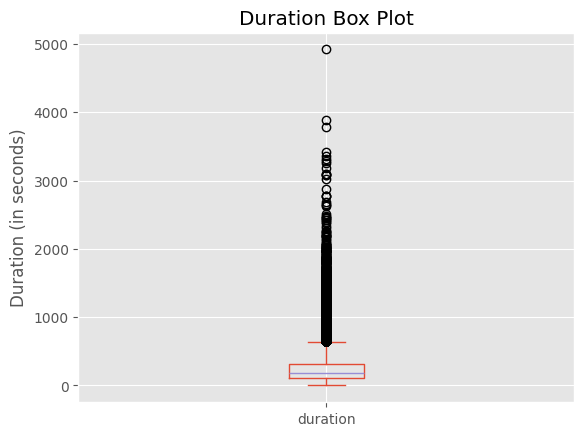

In [34]:
df.duration.plot(kind='box')
plt.ylabel("Duration (in seconds)")
plt.title("Duration Box Plot")
plt.show()

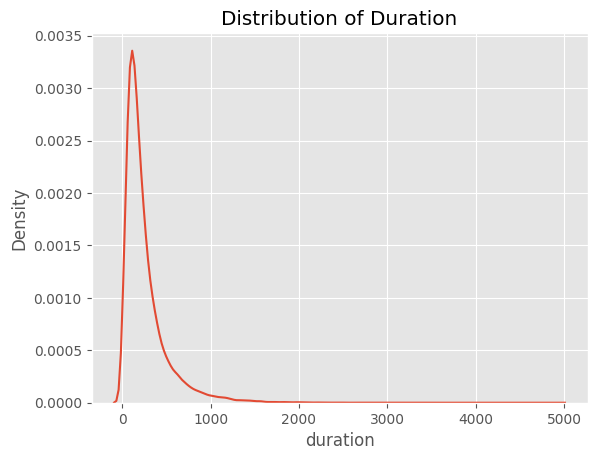

In [35]:
sns.kdeplot(df.duration)
plt.title("Distribution of Duration")
plt.show()

In [36]:
# Drop outliers of duration:
df.drop(df[df.duration > 2500].index, inplace = True)

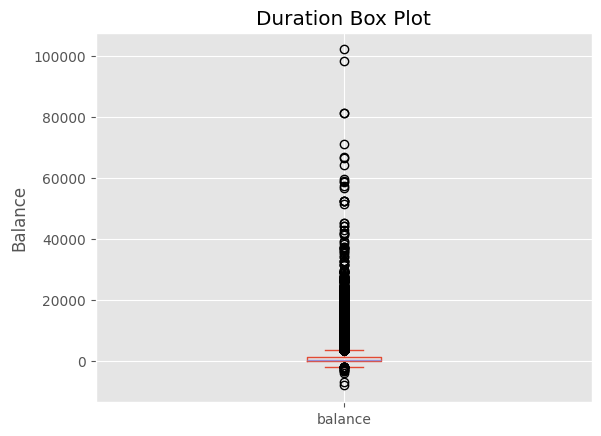

In [37]:
# Box plot after outlier removal:

df.balance.plot(kind='box')
plt.ylabel("Balance")
plt.title("Duration Box Plot")
plt.show()

In [38]:
# Outlier detection of balance column.
df.balance.quantile(0.997)

np.float64(22554.855000000003)

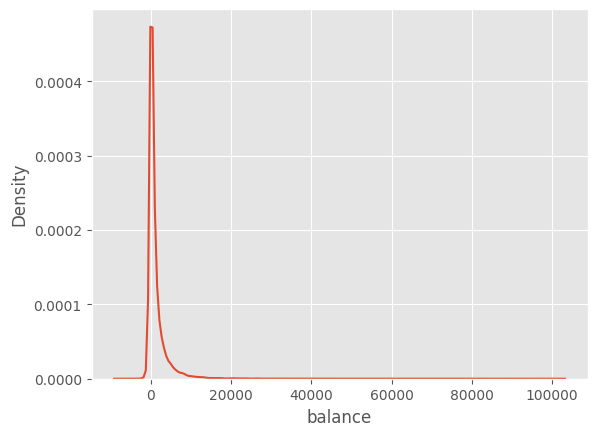

In [39]:
sns.kdeplot(data=df, x='balance')
plt.show()

In [40]:
# Drop outliers of balance:
df.drop(df[df.balance > 22554].index,inplace= True)

In [41]:
# outliers of negative balance:
df2 = df[df.balance < 0]
df2.balance.describe()

count    3748.000000
mean     -318.258271
std       369.636153
min     -8019.000000
25%      -423.000000
50%      -230.000000
75%       -93.000000
max        -1.000000
Name: balance, dtype: float64

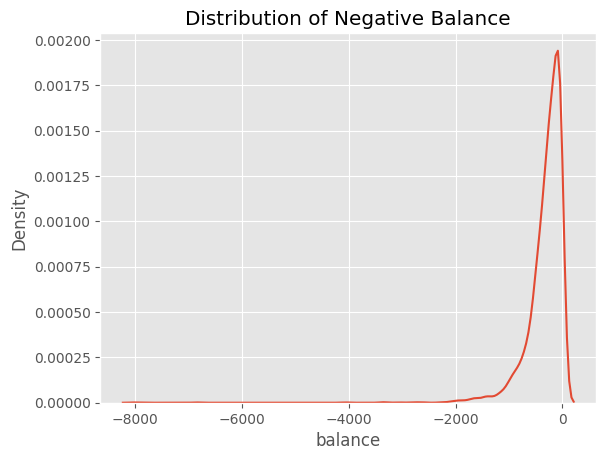

In [42]:
sns.kdeplot(data=df2, x='balance')
plt.title("Distribution of Negative Balance")
plt.show()

In [44]:
# Drop remain Outliers of balance:
df.drop(df[df.balance < -2000].index, inplace=True)

In [46]:
df.previous.quantile(0.997)

np.float64(14.0)

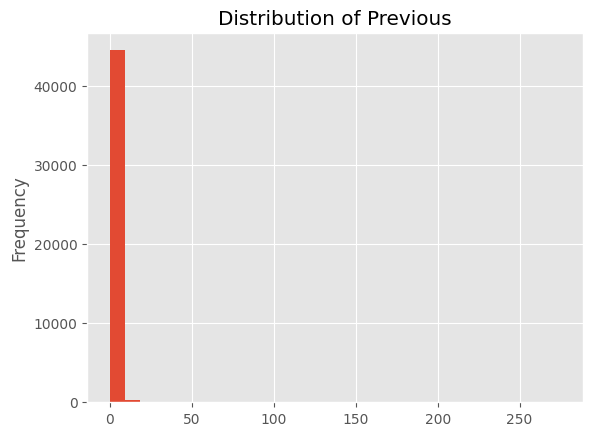

In [47]:
# Histogram plot of previous shows so many new customers:

df.previous.plot(kind='hist', bins=30)
plt.title("Distribution of Previous")
plt.show()

In [48]:
# Drop Outliers of previous:
df.drop(df[df.previous > 14].index, inplace = True)

In [49]:
# What is the relation between the pdays and previous:
df.pdays.value_counts()

pdays
-1      36686
 182      164
 92       144
 183      125
 91       124
        ...  
 749        1
 838        1
 769        1
 587        1
 854        1
Name: count, Length: 556, dtype: int64

In [50]:
df.query('pdays == -1 and previous != 0')
#It shows that if the customer was not contacted in the previous campaign, it shows -1 in pdays.  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group


In [51]:
df.query('pdays != -1 and previous == 0')
#Empty dataframe means that there are no outlier that arise after combining several columns.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group


In [52]:
df.poutcome.value_counts()

poutcome
unknown    36691
failure     4831
other       1766
success     1500
Name: count, dtype: int64

In [ ]:
df.query("poutcome == 'unknown' and pdays>0")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
40658,61,retired,married,tertiary,0,3140,1,1,cellular,6,aug,975,4,98,1,unknown,1,Adults (45-64)
41821,39,management,married,tertiary,0,184,0,0,cellular,15,oct,206,1,168,5,unknown,0,young Adults (25-44)
42042,26,admin.,single,secondary,0,338,0,0,cellular,29,oct,209,1,188,2,unknown,1,young Adults (25-44)
43978,30,technician,single,secondary,0,254,1,1,cellular,24,jun,167,3,416,2,unknown,0,young Adults (25-44)
45021,37,management,married,secondary,0,209,0,0,cellular,14,oct,183,3,528,7,unknown,0,young Adults (25-44)


In [54]:
df.loc[df.query("poutcome=='unknown' and pdays>0").index,'poutcome'] = 'other'
# replace 'unknown' with 'other' in poutcome column where pdays!=-1 

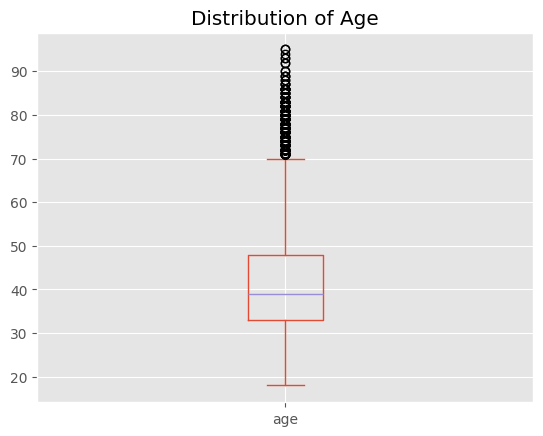

In [55]:
# Outlier detection of age column:

df.age.plot(kind='box')
plt.title("Distribution of Age")
plt.show()

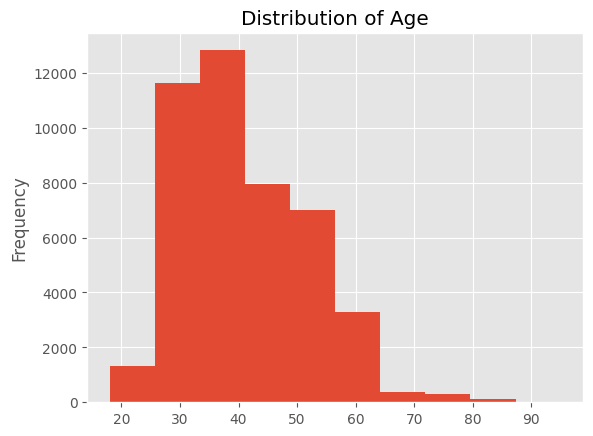

In [56]:
df.age.plot(kind='hist')
plt.title("Distribution of Age")
plt.show()

In [57]:
# Removing ages older than 80
df.drop(df[df.age > 80].index, axis=0, inplace=True)

In [58]:
df.shape

(44691, 18)

### Data Analysis

In [59]:
# Conversion Rate for new and previous campaign:

CVR_n= (df.y.sum() / df.y.count())*100

CVR_p=(df.query("poutcome == 'success'").poutcome.count()/df.query("poutcome != 'unknown'").poutcome.count())*100

print(f'CVR for new campaign:{CVR_n:.1f}%')
print(f'CVR for previous campaign:{CVR_p:.1f}%')

CVR for new campaign:11.6%
CVR for previous campaign:18.4%


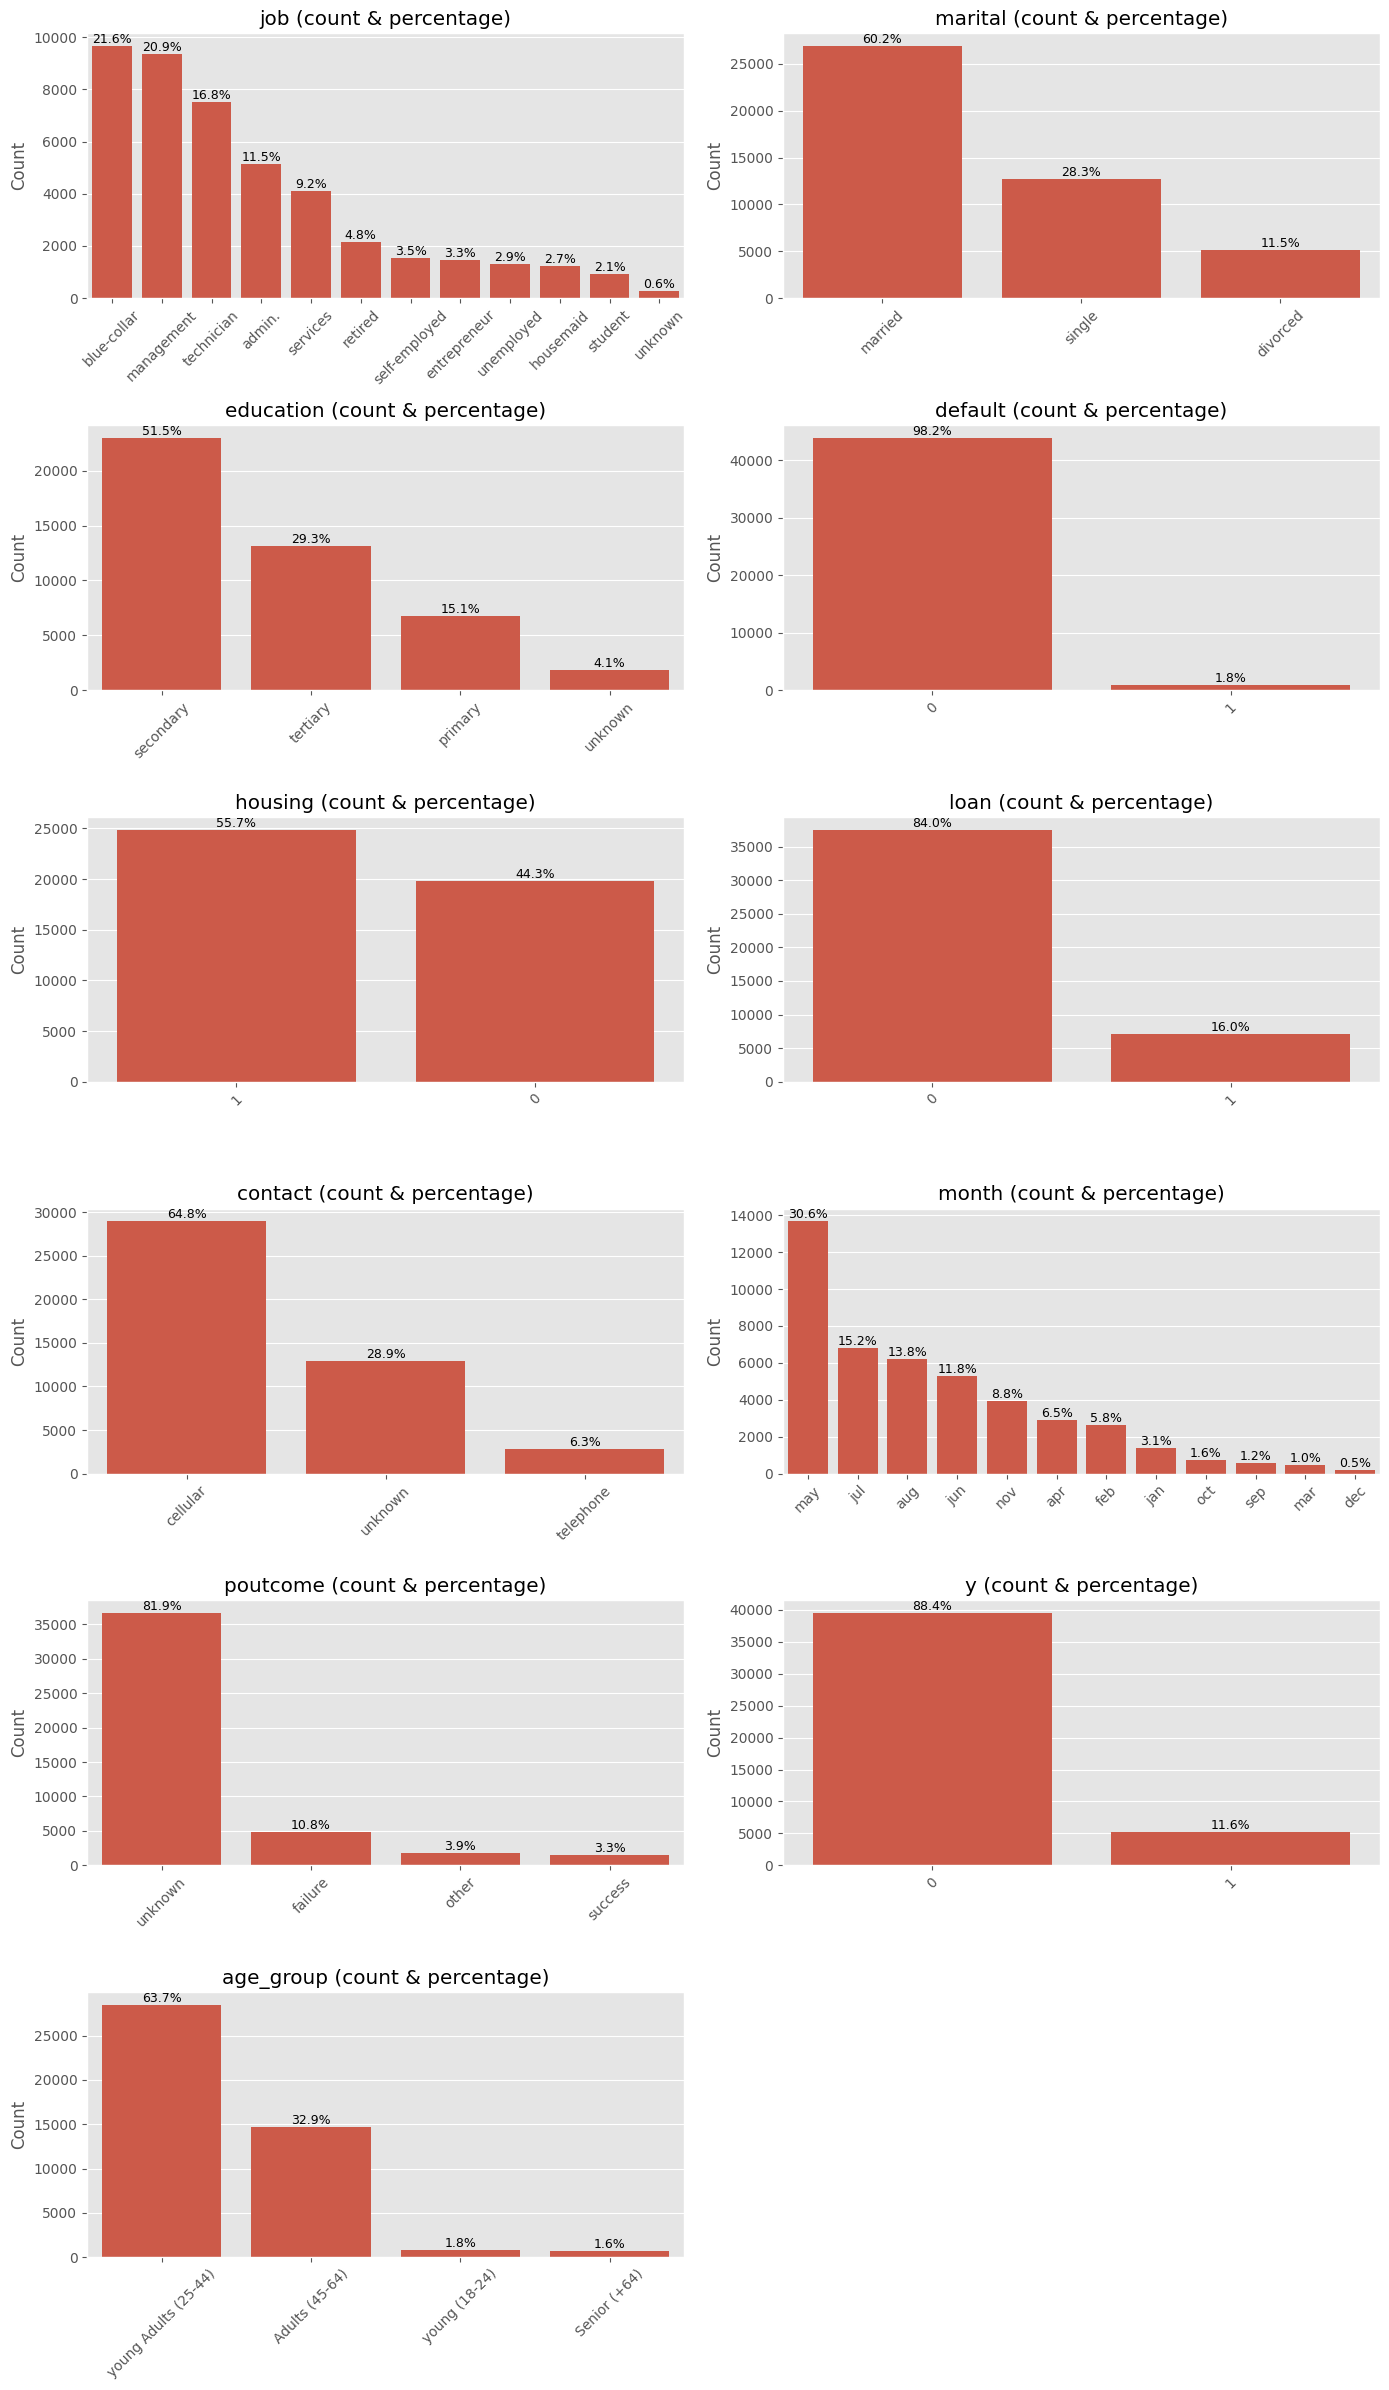

In [106]:
# Bar plot of all categorical columns:

n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

# Loop over categorical columns
for i, col in enumerate(cat_cols):
    ax = axes[i]
    total = len(df)
    
    # Countplot
    sns.countplot(data=df, x=col, ax=ax, order=df[col].value_counts().index)
    
    # Annotate with percentage
    for p in ax.patches:
        count = p.get_height()
        percentage = 100 * count / total
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., count),
                    ha='center', va='bottom', fontsize=9, color='black')

    ax.set_title(f"{col} (count & percentage)")
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

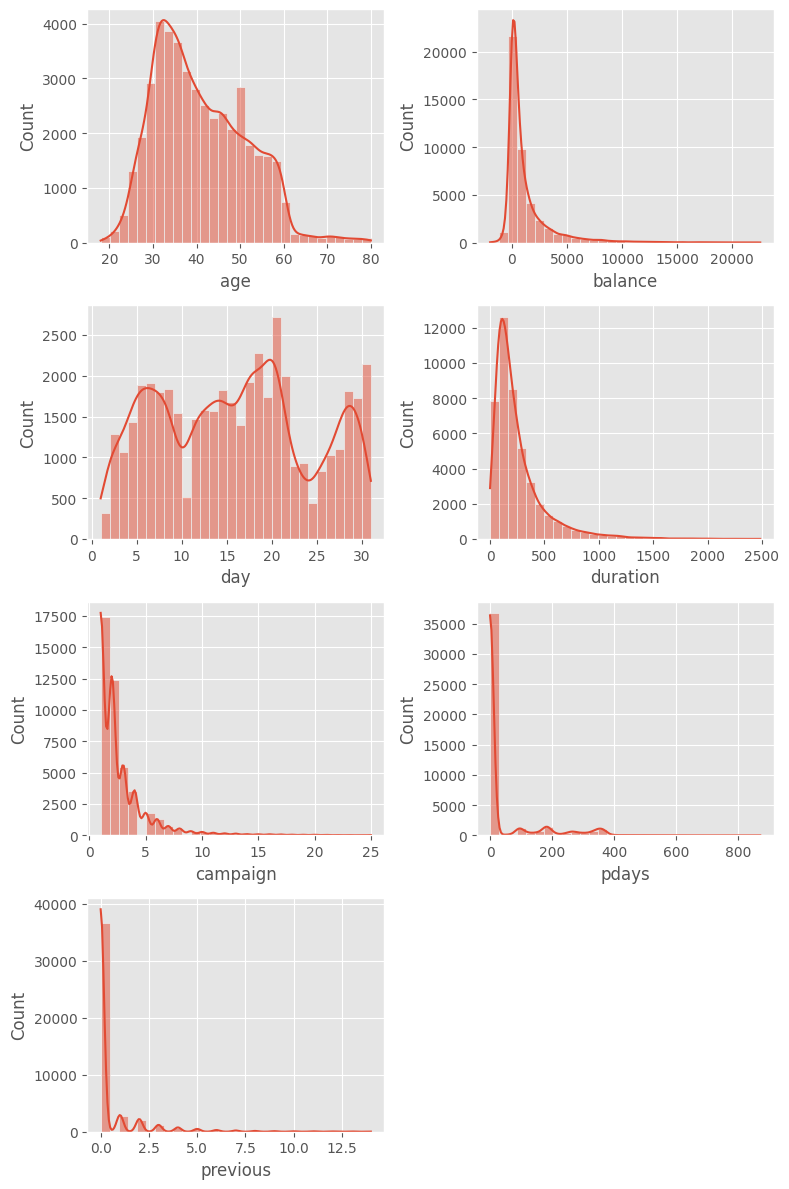

In [61]:
# Histogram of all numerical columns:

plt.figure(figsize=(8, 12))
for i in range(7):
    plt.subplot(4,2,i+1)
    sns.histplot(data=df[num_cols[i]],bins=30,kde=True)
plt.tight_layout()

plt.show()

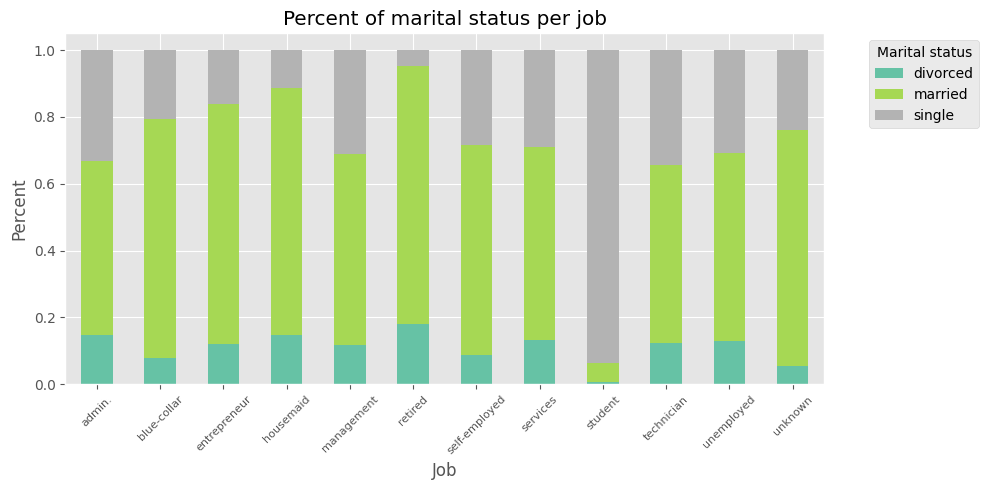

In [62]:
# Relation of job and marital status of customers:

prop_table = pd.crosstab(df['job'], df['marital'], normalize='index')
prop_table.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10,5))

plt.title("Percent of marital status per job",)
plt.ylabel("Percent")
plt.xlabel("Job")
plt.legend(title="Marital status", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()

plt.show()

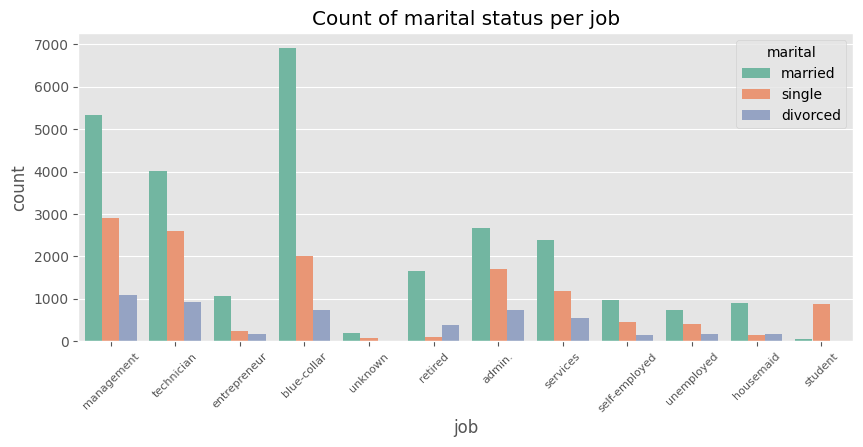

In [63]:
plt.figure(figsize=(10,4))

sns.countplot(data=df, x='job', hue='marital', palette='Set2')
plt.xticks(rotation=45,fontsize=8)
plt.title("Count of marital status per job")
plt.show()

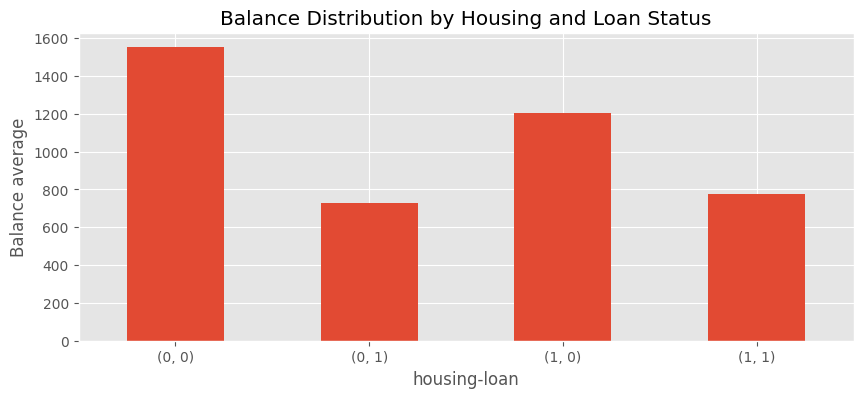

In [64]:
# Visualizing the balance of various housing and loan status.

df_= df.groupby(['housing', 'loan'])['balance'].mean()
df_.plot(kind='bar', figsize=(10,4))

plt.xlabel('housing-loan')
plt.xticks(rotation=0)
plt.ylabel('Balance average')
plt.title('Balance Distribution by Housing and Loan Status')

plt.show()

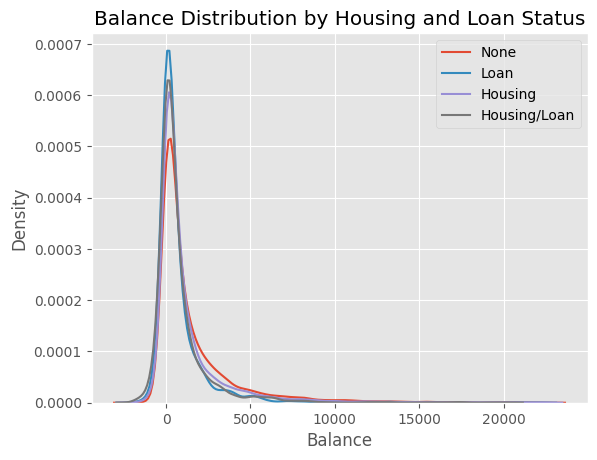

In [65]:
# Distribution of balance for each loan and housing status:

df_b = df.groupby(['housing', 'loan'])['balance']
sns.kdeplot(df_b.get_group((0, 0)), label='None')
sns.kdeplot(df_b.get_group((0, 1)), label='Loan')
sns.kdeplot(df_b.get_group((1, 0)), label='Housing')
sns.kdeplot(df_b.get_group((1, 1)), label='Housing/Loan')

plt.xlabel('Balance')
plt.ylabel('Density')
plt.title('Balance Distribution by Housing and Loan Status')
plt.legend()

plt.show()

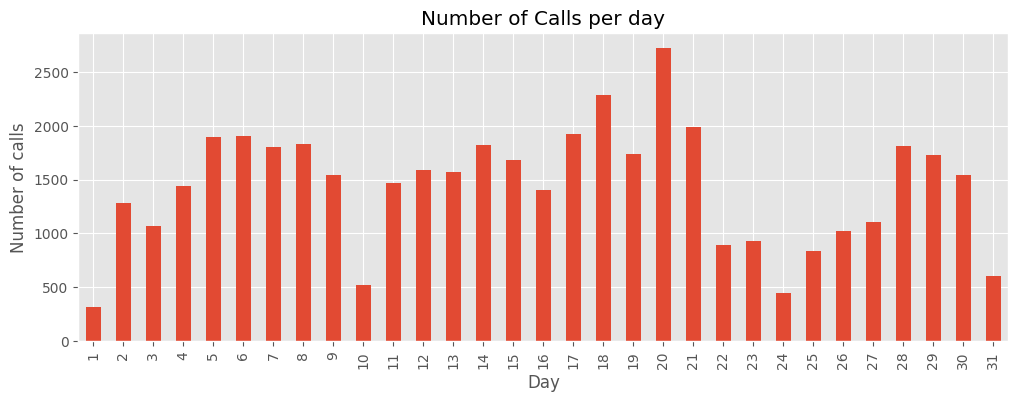

In [66]:
# Plot to show the number of calls per day in a month:

df.groupby('day')['campaign'].count().plot(kind='bar', figsize=(12,4), title="Number of Calls per day")

plt.ylabel("Number of calls")
plt.xlabel("Day")

plt.show()

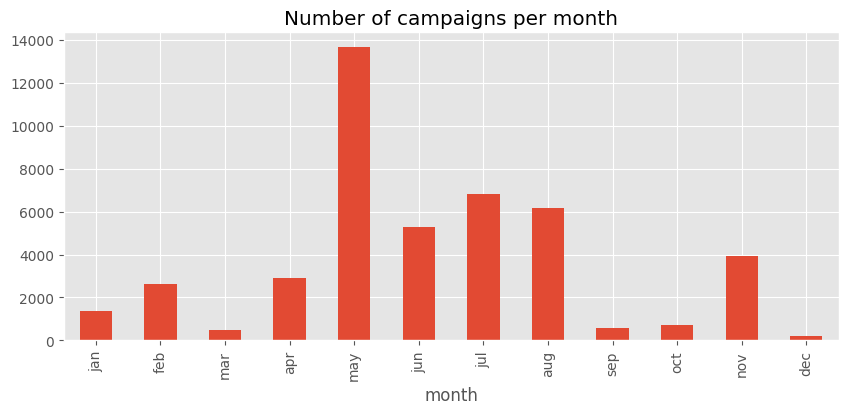

In [69]:
# Plot to show that number of campaign per month:

months_order = [
    'jan', 'feb', 'mar', 'apr', 'may', 'jun',
    'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
]
monthly_counts =df.groupby('month')['campaign'].count().reindex(months_order)
monthly_counts.plot(kind='bar', figsize=(10,4), title="Number of campaigns per month")

plt.show()

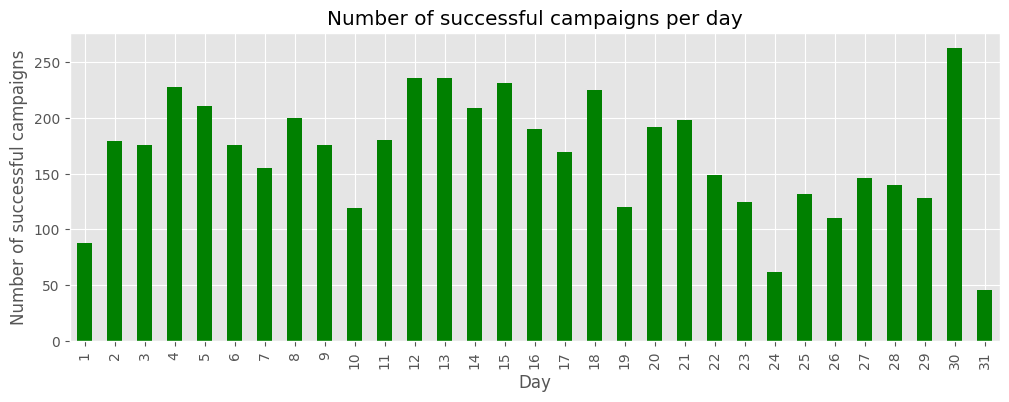

In [70]:
# Filtering by Successful Campaign:

dfy=df.query('y == 1')
plt.figure(figsize=(12,4))
dfy.groupby('day')['campaign'].count().plot(kind='bar', color='green')

plt.title("Number of successful campaigns per day")
plt.xlabel("Day")
plt.ylabel("Number of successful campaigns")

plt.show()

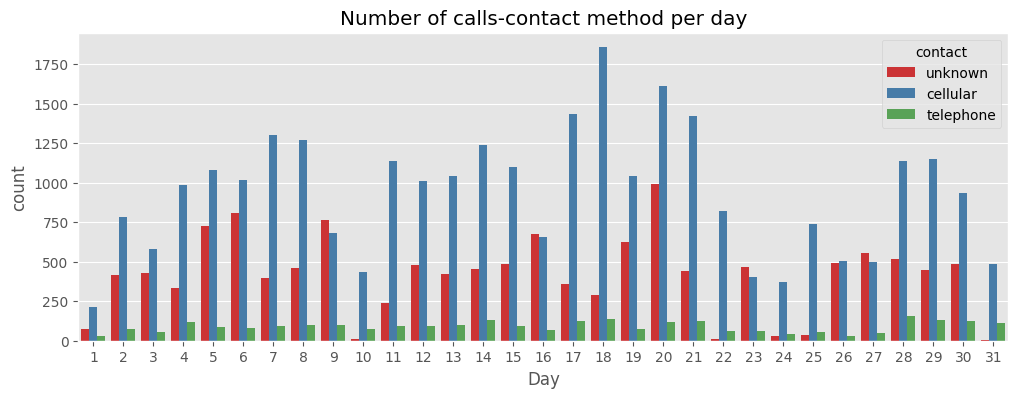

In [71]:
# Visualizing the number of calls per day by contact method:

plt.figure(figsize=(12,4))
sns.countplot(data= df, x = 'day', hue='contact', palette='Set1')

plt.title("Number of calls-contact method per day")
plt.xlabel("Day")

plt.show()

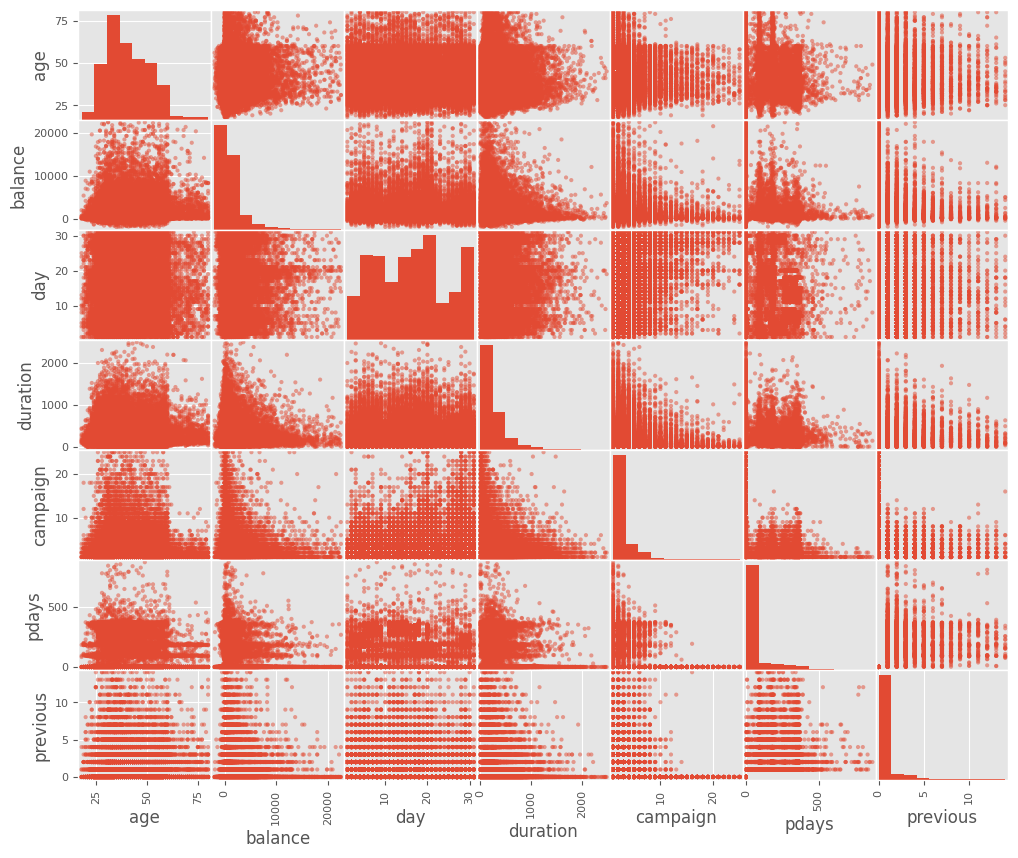

In [72]:
# Showing the relationship between the numerical columns:

pd.plotting.scatter_matrix(df[num_cols],figsize=(12,10))
plt.show()

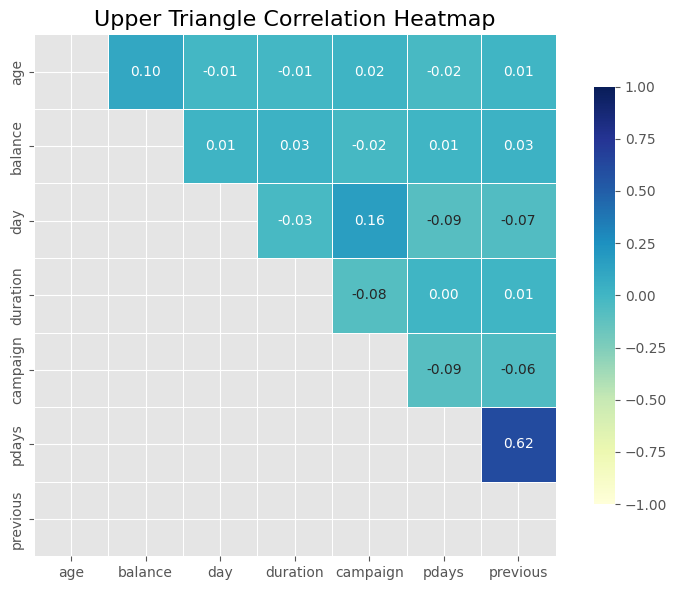

In [73]:
# Correlation Heatmap:

corr = df[num_cols].corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    mask=mask,                  # Apply mask to hide lower triangle
    cmap='YlGnBu',              # Color map
    annot=True,                 # Annotate with correlation coefficients
    fmt=".2f",                  # Format of annotations
    linewidths=0.5,             # Line width between cells
    linecolor='white',          # Line color between cells
    square=True,                # Make cells square
    cbar_kws={"shrink": 0.8},   # Color bar shrink
    vmin=-1, vmax=1             # Set color scale range
)

plt.title("Upper Triangle Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

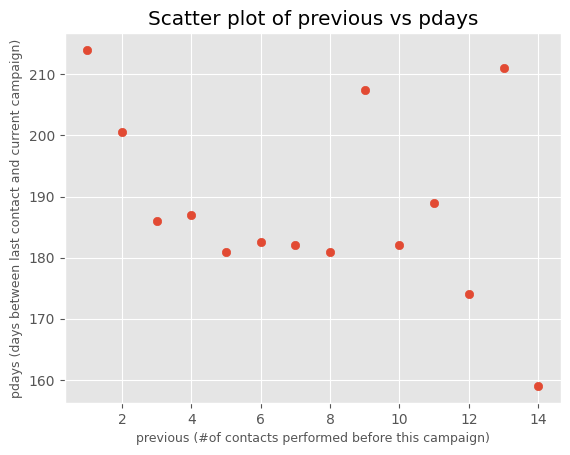

In [74]:
# Scatter plot of previous vs pdays median, to illustrate the relationship between them.
# Filter pdays = -1 since there is no value to analze their correlation.

df_temp =  df.query('pdays != -1').groupby('previous').pdays.median()
plt.scatter(df_temp.index,df_temp.values)

plt.ylabel('pdays (days between last contact and current campaign)',fontsize=9)
plt.xlabel('previous (#of contacts performed before this campaign)',fontsize=9)
plt.title('Scatter plot of previous vs pdays')

plt.show()

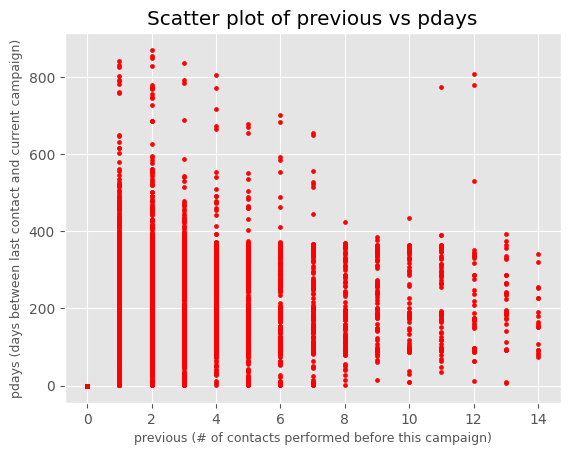

In [75]:
# Is there a meaningful linear relation between pdays and previous, or the correlation coefficient is fictious?

plt.scatter(df.previous,df.pdays,c='r',marker=('o'),s=8)

plt.xlabel('previous (# of contacts performed before this campaign)',fontsize=9)
plt.ylabel('pdays (days between last contact and current campaign)',fontsize=9)
plt.title('Scatter plot of previous vs pdays')

plt.show()

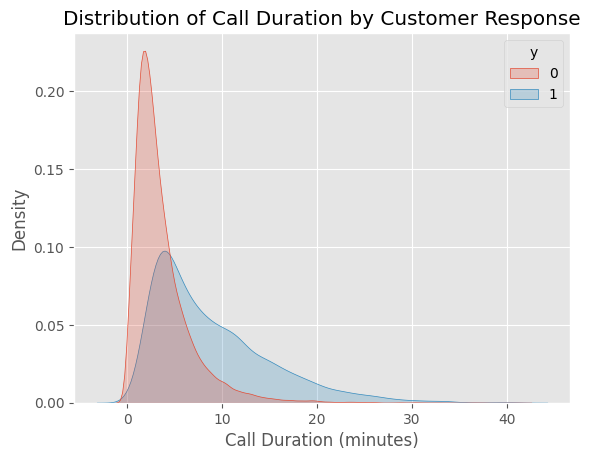

In [76]:
# Looking at the hist plot of duration, to discriminate between successful and unsuccessful calls.

df['duration_min'] = df['duration'] / 60
sns.kdeplot(data=df, x='duration_min', hue='y', fill=True, common_norm=False)

plt.title("Distribution of Call Duration by Customer Response")
plt.xlabel("Call Duration (minutes)")

plt.show()

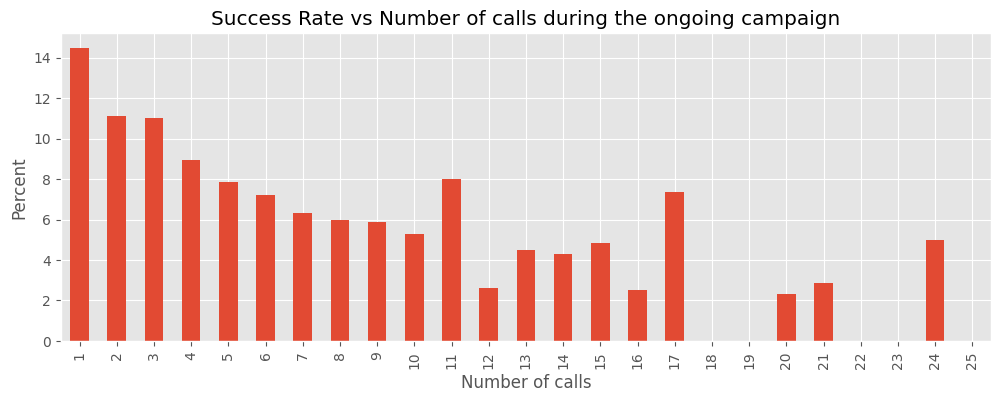

In [78]:
# Analyzing the effect of number of calls on success rate:

plt.figure(figsize=(12,4))
(df.groupby('campaign')['y'].mean()*100).plot(kind='bar')

plt.ylabel("Percent")
plt.xlabel("Number of calls")
plt.title("Success Rate vs Number of calls during the ongoing campaign")

plt.show()

In [79]:
# Analyzing the effect of previous outcome on success rate:
pd.crosstab(df.poutcome,df.y)

y,0,1
poutcome,,
failure,4213,608
other,1470,293
success,526,963
unknown,33287,3331


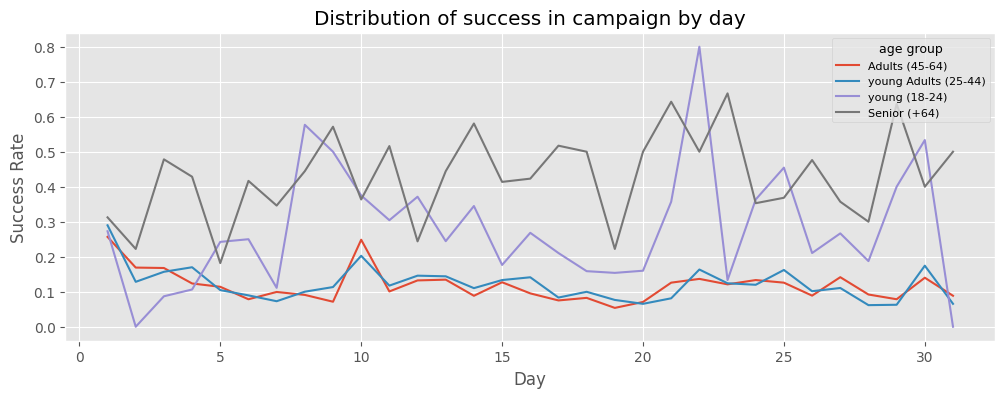

In [83]:
# Distribution of success in campaign by day:

plt.figure(figsize=(12,4))
ax=sns.lineplot(x='day', y='y', data = df, hue ='age_group', errorbar=None)

plt.title('Distribution of success in campaign by day')
plt.xlabel('Day')
plt.ylabel('Success Rate')
plt.legend(title='age group',title_fontsize=9)
sns.move_legend(ax, "upper right",fontsize=8)
plt.grid(True)

plt.show()

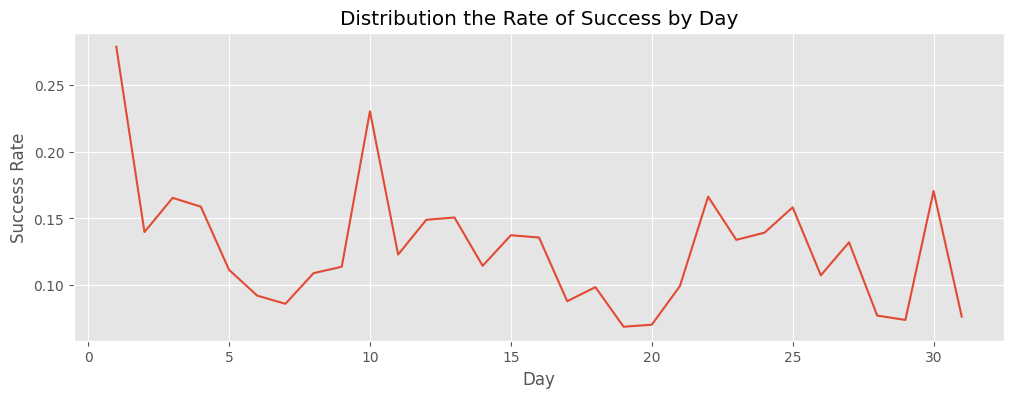

In [84]:
# Success rate by day in line plot:

plt.figure(figsize=(12,4))
sns.lineplot(data= df, x = 'day', y='y', errorbar=None)

plt.xlabel('Day')
plt.ylabel('Success Rate')
plt.title('Distribution the Rate of Success by Day')
plt.grid(True)

plt.show()

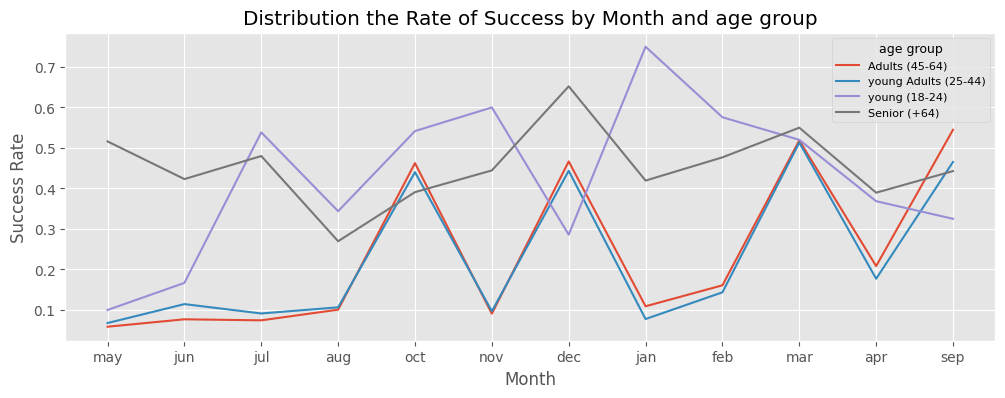

In [85]:
# Distribution of success by month grouped by age_group:

plt.figure(figsize=(12,4))
ax=sns.lineplot(x='month', y='y', data = df, hue ='age_group', errorbar=None)

plt.title('Distribution the Rate of Success by Month and age group')
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.legend(title='age group',title_fontsize=9)
sns.move_legend(ax, "upper right",fontsize=8)
plt.grid(True)

plt.show()

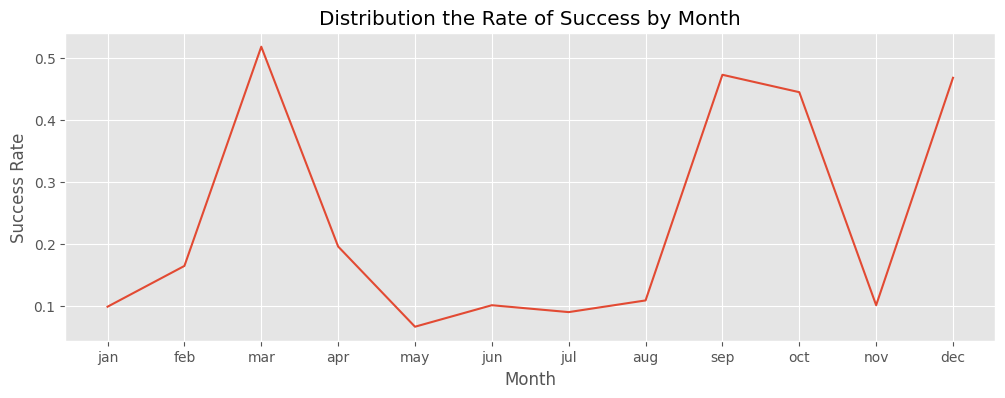

In [86]:
# Success rate by month in line plot:

plt.figure(figsize=(12,4))
df["month"] = pd.Categorical(df["month"],
                             categories=months_order,
                             ordered=True)
sns.lineplot(data= df, x = 'month', y='y', errorbar=None)

plt.title('Distribution the Rate of Success by Month')
plt.ylabel("Success Rate")
plt.xlabel("Month")
plt.grid(True)

plt.show()

In [87]:
# Relationship of combination of 'housing','loan', and 'default' on balance and success outcome:

df.groupby(['housing', 'loan','default'], as_index=False).agg({'balance':'mean','y':'mean'}).sort_values('balance',ascending=False)

,housing,loan,default,balance,y
0,0,0,0,1571.272287,0.182122
4,1,0,0,1224.657513,0.080507
6,1,1,0,804.788278,0.060287
2,0,1,0,774.811384,0.078125
1,0,0,1,-17.514151,0.070755
3,0,1,1,-42.748466,0.049080
7,1,1,1,-154.356589,0.054264
5,1,0,1,-176.257525,0.073579


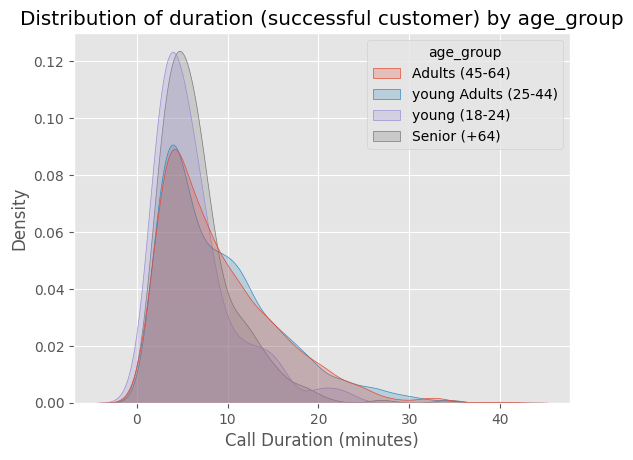

In [88]:
# Distribution of call duration of successful calls, grouped by age_group:

dfy= df[df['y']==1]
dfy = dfy.assign(duration_min = dfy['duration'] / 60)
sns.kdeplot(data=dfy, x='duration_min', hue='age_group', fill=True, common_norm=False)

plt.title("Distribution of duration (successful customer) by age_group")
plt.xlabel("Call Duration (minutes)")

plt.show()

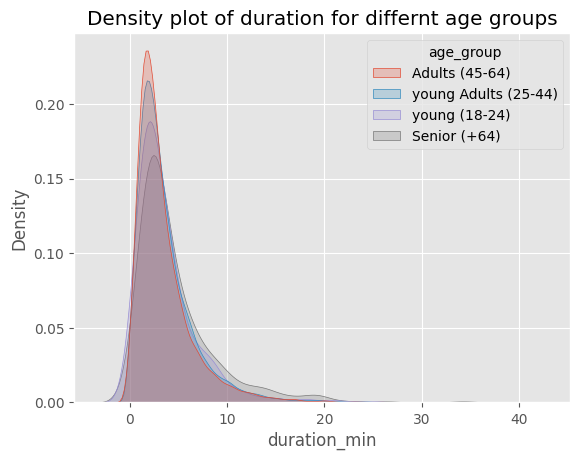

In [89]:
# Distribution of call duration of fail calls, grouped by age_group:

dfy0 = df[df['y']==0]
dfy0 = dfy0.assign(duration_min = dfy0['duration'] / 60)
sns.kdeplot(data=dfy0, x='duration_min', hue='age_group', fill=True, common_norm=False)

plt.title("Density plot of duration for differnt age groups")
plt.show()

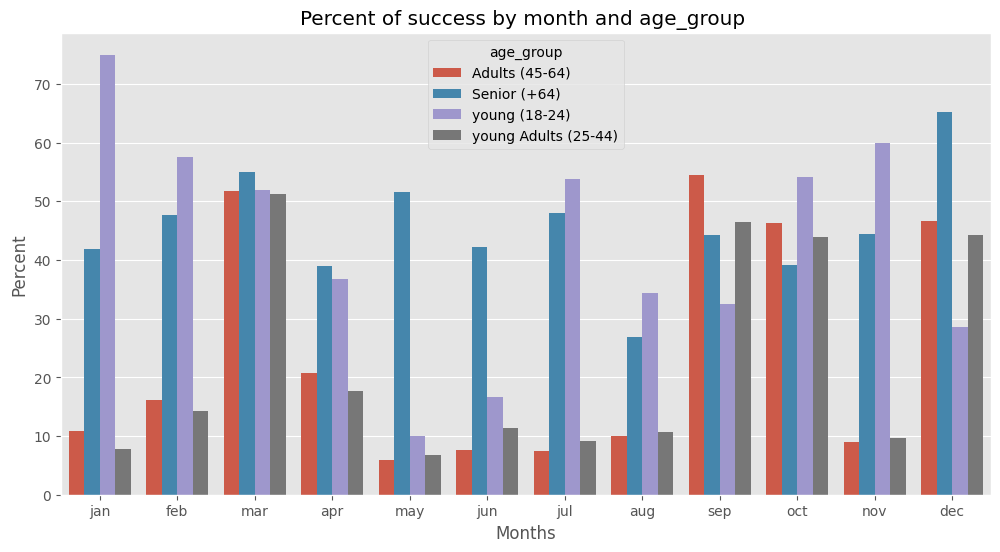

In [91]:
# Percent of successful calls grouped by month and age_group:

df_g = dfy.groupby(['age_group','month']).agg({'age':'count'}).reset_index()

df_g['age'] = df_g['age'] / df.groupby(['age_group','month']).size().reset_index()[0]*100
plt.figure(figsize=(12,6))
sns.barplot(data=df_g,hue='age_group',y='age',x='month',order=months_order)

plt.xlabel("Months")
plt.ylabel("Percent")
plt.title("Percent of success by month and age_group ")

plt.show()

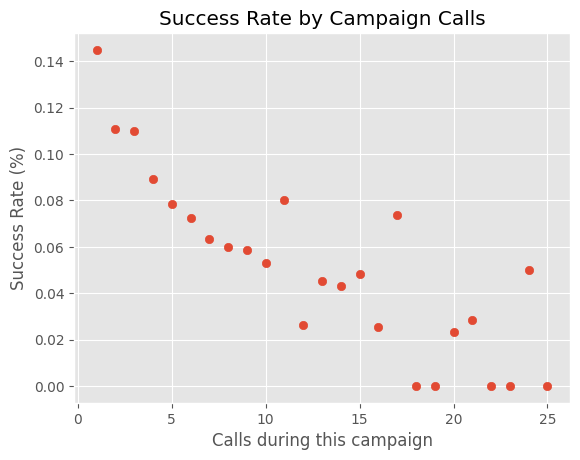

In [92]:
# Scatter plot of success rate by campaign calls:

def success_percent_of_campagin(df,campaign):
    return df.query("campaign == @campaign").y.mean()
x = df.campaign.unique()
y = [success_percent_of_campagin(df,i) for i in x]

plt.scatter(x,y)
plt.xlabel('Calls during this campaign')
plt.ylabel('Success Rate (%)')
plt.title('Success Rate by Campaign Calls')

plt.show()

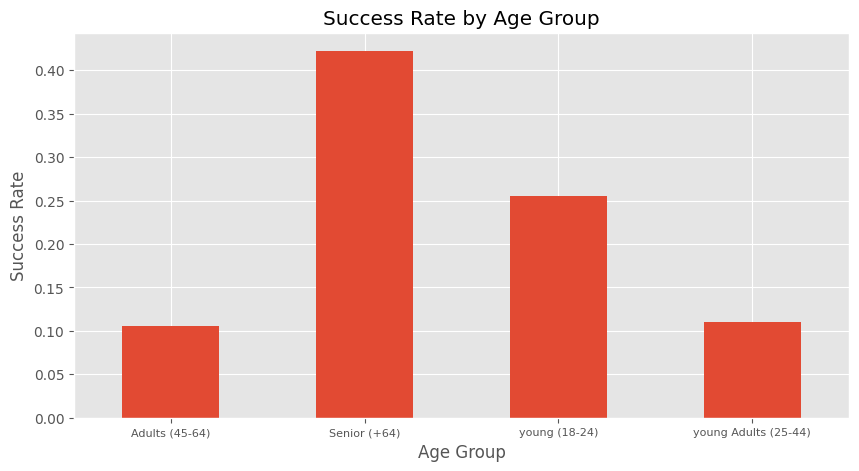

In [102]:
# Bar plot of success rate by Age Group:

ax=(df.groupby('age_group')['y'].mean()).plot(kind='bar', figsize=(10, 5), title='Success Rate by Age Group')

plt.xlabel('Age Group')
plt.ylabel('Success Rate')
plt.xticks(rotation=0, fontsize=8)

plt.show()

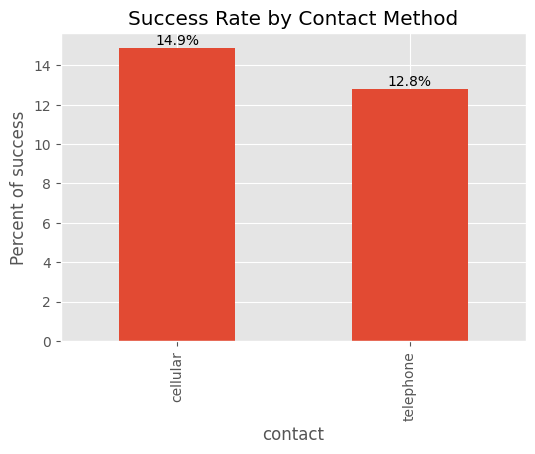

In [105]:
# Bar plot of success rate by contact method:

series = (df.query('contact == "cellular" or contact == "telephone"').groupby('contact').y.mean() * 100)

fig, ax = plt.subplots(figsize=(6, 4))
bars = series.plot(kind='bar', ax=ax)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',                     
        xy=(bar.get_x() + bar.get_width() / 2, height), 
        xytext=(0, 0),                        
        textcoords="offset points",
        ha='center',                          
        va='bottom'                           
    )

ax.set_title('Success Rate by Contact Method')
ax.set_ylabel('Percent of success')

plt.show()
